# Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('../data/survey_clean_rick.csv')
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0,1,0,0,1,0,0,0,1,0
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0,1,0,0,1,0,0,0,1,0


In [3]:
df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'NObeyesdad',
       'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

### KMeans

In [4]:
X = df[['Height', 'Weight']]

In [5]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [6]:
df['cluster'] = km.labels_
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,cluster
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,1,0,0,0,1,0,0,1,0,2
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,1,0,0,1,0,0,0,1,0,2
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,1,0,1,0,0,0,0,1,0,0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,1,0,1,0,0,0,0,0,1,0
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,1,0,0,1,0,0,0,1,0,0


In [14]:
df.cluster.value_counts(normalize = True)

1    0.342018
2    0.334912
0    0.323070
Name: cluster, dtype: float64

In [7]:
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[  1.74834894,  73.55807521],
       [  1.75669642, 116.20962644],
       [  1.6006786 ,  68.90786609]])

In [8]:
centroids = pd.DataFrame(centroids, columns = ['Height', 'Weight'])

centroids

,Height,Weight
0,1.748349,73.558075
1,1.756696,116.209626
2,1.600679,68.907866


<Figure size 720x576 with 0 Axes>

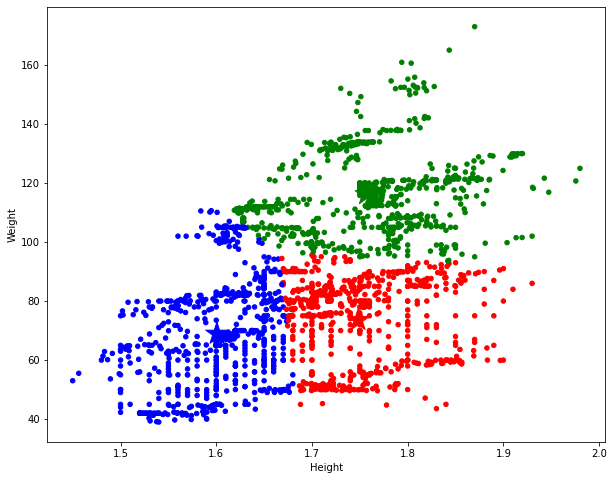

In [9]:
plt.figure(figsize=(10,8))

# Map colors for different clusters
colors = ['red', 'green', 'blue']
df['color'] = df['cluster'].map(lambda p: colors[p])

# Plot points
ax = df.plot(    
    kind='scatter', 
    x = 'Height', y = 'Weight',
    figsize=(10,8),
    c = df['color']
)

# Plot Centroids
centroids.plot(
    kind='scatter', 
    x = 'Height', y = 'Weight', 
    marker='*', c=['r', 'g', 'b'], s=550, ax=ax
);

In [10]:
silhouette_score(X_scaled, km.labels_)

0.36668452434441656

C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0.5, 1.0, 'Inertia Scores')

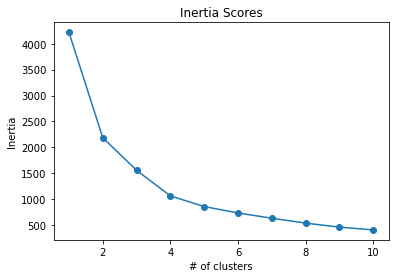

In [16]:
inertia_list = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertia_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores')

In [17]:
df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'NObeyesdad',
       'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'cluster', 'color'],
      dtype='object')

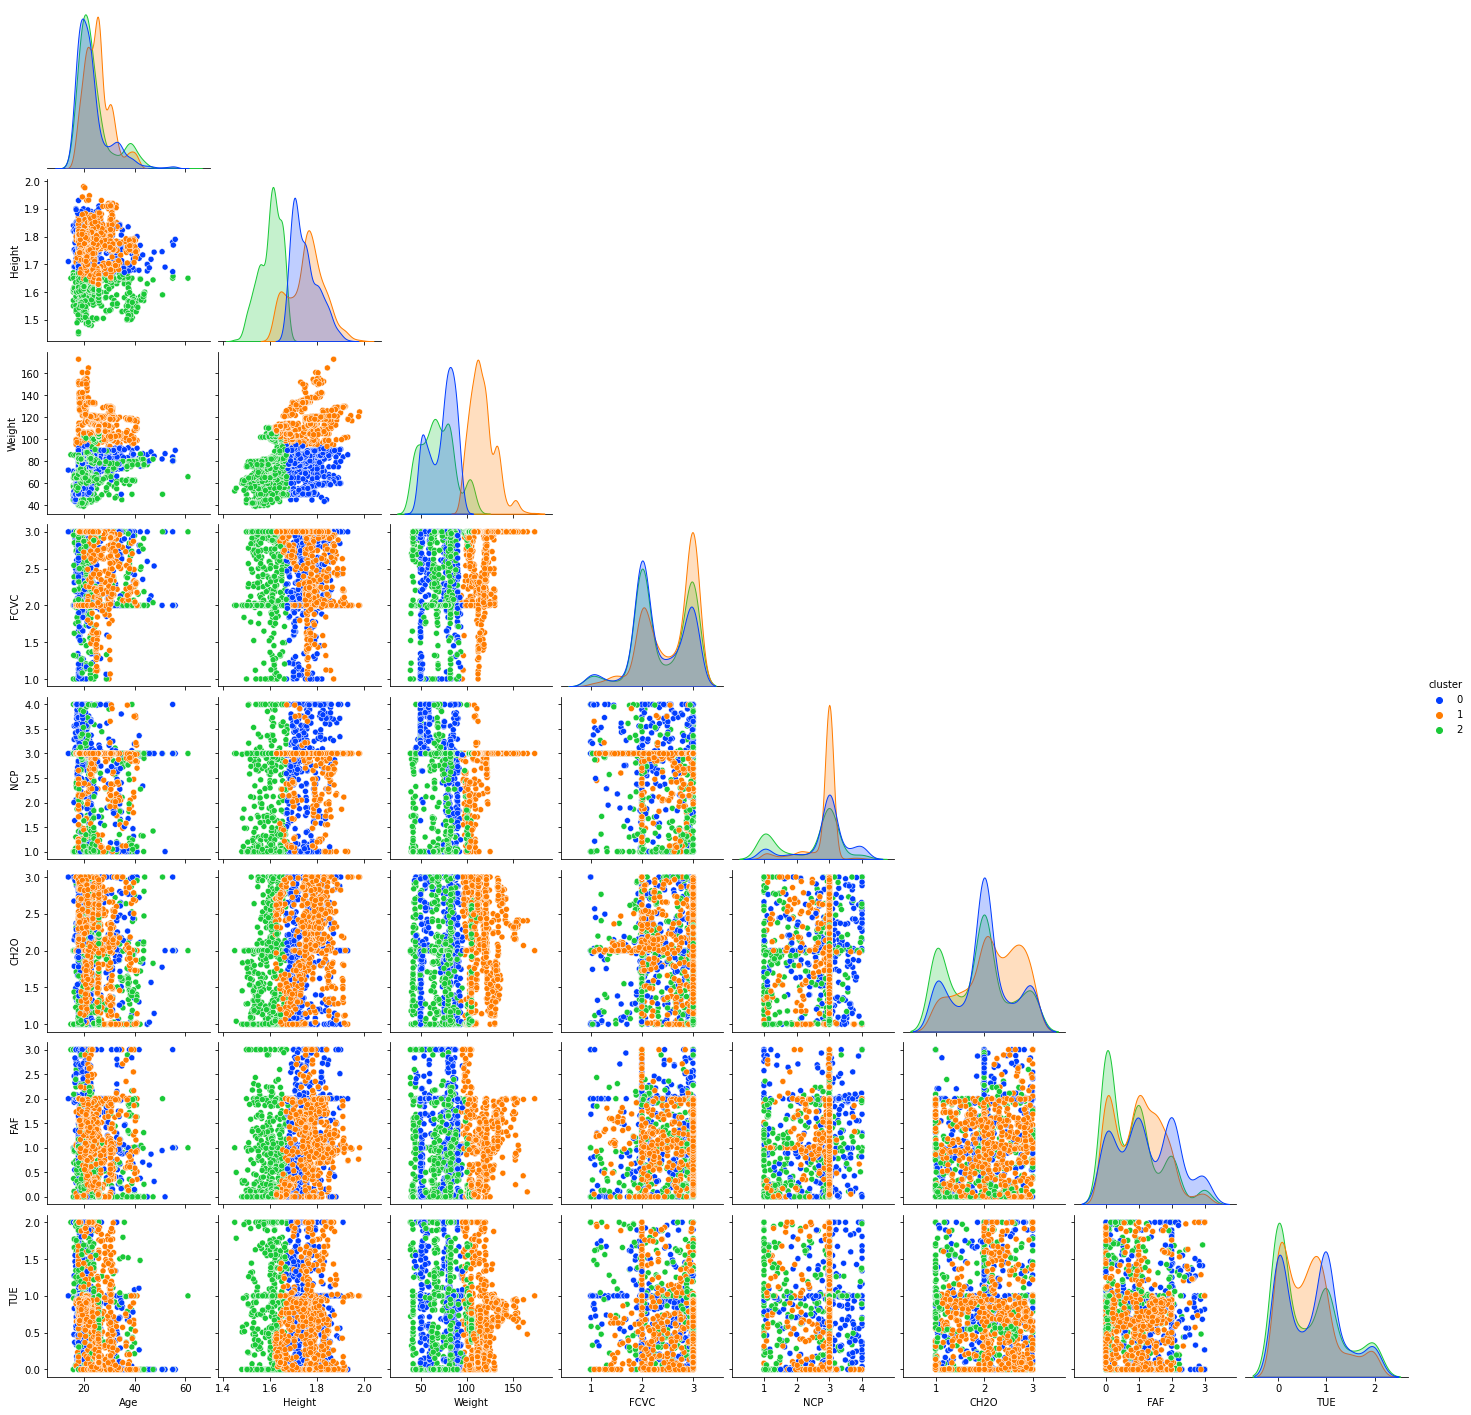

In [20]:
sns.pairplot(df.drop(columns = ['family_history_with_overweight', 'FAVC','SMOKE', 'SCC', 'NObeyesdad',
                                'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
                                'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                                'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',]), 
             hue = 'cluster', palette = 'bright', corner = True)